## This file is to convert hdf5 file, which works for the Text2Image model, to images and captions, which works for the Image2Text model

In [1]:
import torch as th
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
from PIL import Image
import io
import json

/zf18/fz2ds/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Open and check the dataset

class
embeddings
img
name
txt
()
class_00011
(1024,)
image_03095
a flower with long and wide petals that are a pale yellow.



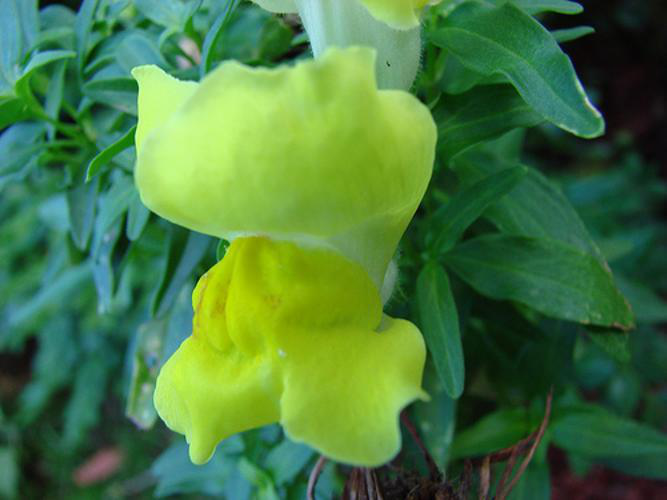

In [11]:
f = h5py.File('flowers.hdf5')
train = f['train']
val = f['valid']
test = f['test']

# In the dataset there are total 40945 images, every five of them has the same image, with different captions.
img_data = test['image_03095_1']
for item in img_data:
    print(item)
print(img_data['img'].shape)
print(img_data['class'][()])
print(img_data['embeddings'].shape)
print(img_data['name'][()])
print(img_data['txt'][()])

img = np.array(img_data['img']).tobytes()
Image.open(io.BytesIO(img))

## Store the images and captions in the dataset

### Test

In [56]:
whole = []
test = {}
test['image_id'] = 'image_00002_1'
test['caption'] = 'the flower has stamen and the petals are green in color.'
whole.append(test)


output_file = 'flowers_processed/captions.json'

with open(output_file, 'w') as outfile:
    json.dump(whole, outfile)
    
with open(output_file, 'r') as outfile:
    temp = json.load(outfile)
print(temp[0]['caption'])

the flower has stamen and the petals are green in color.


### Store all the images and captions

In [76]:
for split in ['train', 'valid', 'test']:
    dataset = f[split]
    img_dir = 'flowers_processed/'+ split +'_imgs/'
    caption_file = 'flowers_processed/'+ split +'.json'
    arr = []
    
    for image_id in dataset:
        data = dataset[image_id]
        caption = data['txt'][()]
        img = data['img']
        
        temp = {}
        temp['image_id'] = image_id
        temp['caption'] = caption
        arr.append(temp)
        
        Image.open(io.BytesIO(np.array(img).tobytes())).save(img_dir + image_id + '.jpg')
        
    with open(caption_file, 'w') as cf:
        json.dump(arr, cf)

In [89]:
j = 'flowers_processed/train.json'

with open(j, 'r') as jsonFile:
    data = json.load(jsonFile)
    caption = data[0]['caption']
    print caption

prominent purple stigma,petals are white inc olor



## After creating the vocabulary using build_vocab.py, let's see what's inside

In [103]:
import pickle
from Image2Text.build_vocab import Vocabulary
pkl = '/zf18/fz2ds/Text2Image/Text2ImageGenerateModel/flowers_processed/vocab.pkl'
with open(pkl, 'r') as f:
    vocab = pickle.load(f)
print(vocab.word2idx['flower'])
print(vocab.idx2word[0])

778
<pad>
